<a href="https://colab.research.google.com/github/prat-hart/Algorithms/blob/main/Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Objective

Implement 2 different machine learning algorithms
*   Stochastic Gradient Descent
*   ID3 Decision Tree


##Import Libraries



In [ ]:
# import all required libraries
from google.colab import drive
import pandas as pd
from random import shuffle
from collections import Counter
from math import exp,log
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"

#Stochastic Gradient Descent

In this section, I implement the Stochastic Gradient Descent algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, I assume that I am given **all binary-valued attributes** and that there are **no missing values** in the train or test data. 


##Algorithm

In [ ]:
train_gd=pd.read_csv(basePath + "gd-train.dat", delim_whitespace="/t")
test_gd=pd.read_csv(basePath + "gd-test.dat", delim_whitespace="/t")

In [ ]:
# Activation Function - implement Sigmoid
def sigmoid_activation(h):
# given 'h' compute and return 'z' based on the activation function implemented
  return 1/(1 + np.exp(-h))

In [ ]:
# Train the model using the given training dataset and the learning rate
# return the "weights" learnt for the perceptron - include the weight assocaited with bias as the last entry
def train(train_data, learning_rate=0.05):
    weights=np.zeros(len(train_data.columns))
    train_data=train_data.sample(frac=1).reset_index(drop=True)
    y=train_data.iloc[:,-1]
    attributes=pd.concat([train_data.loc[:, train_data.columns != 'C'],pd.DataFrame([1]*len(train_data),columns=['B'])],axis=1)
    for i,x in attributes.iterrows():
      h=np.dot(x.values,weights)
      z=[sigmoid_activation(h)]
      error=y[i]-z
      # update all weights individually using learning_rate, (y-z), and the corresponding 'x'
      weights=weights+learning_rate*(error)*x
    return weights # return the final learnt weights

In [ ]:
# Test the model (weights learnt) using the given test dataset
# return the accuracy value
def test(test_data, weights, threshold=0.5):
    # go through each training data instance
    y=test_data.iloc[:,-1]
    attributes=pd.concat([test_data.loc[:, test_data.columns != 'C'],pd.DataFrame([1]*len(test_data),columns=['B'])],axis=1)
    labels=[]
    for i,x in attributes.iterrows():
      h=np.dot(x.values,weights)
      z=sigmoid_activation(h)
      labels.append(1 if z>=threshold else 0)
    compare=labels-y
    accuracy=(compare==0).sum()/len(compare)
    return accuracy
        # use 'threshold' to convert 'z' to either 0 or 1 so as to match to the ground truth binary labels
        # compare the normalized 'z' with 'y' to calculate the positive and negative instances for calculating accuracy
    # return the accuracy value for the given test dataset
    

In [ ]:
# Gradient Descent function
def gradient_descent(df_train, df_test, learning_rate=0.5, threshold=0.5):
    # call the train function to train the model and obtain the weights
    w= train(df_train,learning_rate)
    # call the test function with the training dataset to obtain the training accuracy
    training_accuracy=test(df_train,w,threshold)
    # call the test function with the testing dataset to obtain the testing accuracy
    testing_accuracy=test(df_test,w,threshold)
    # return (trainAccuracy, testAccuracy)
    return training_accuracy,testing_accuracy

In [ ]:
# Main algorithm loop
train_pts=[]
test_pts=[]
learning_rts=[]
for lr in np.arange(.05,1.05,.05):
  x,y=gradient_descent(train_gd,test_gd,lr)
  train_pts.append(x)
  test_pts.append(y)
  learning_rts.append(lr)
  print(f'Accuracy for LR of {lr} on Training set = {x} ')
  print(f'Accuracy for LR of {lr} on Testing set = {y} ')


Accuracy for LR of 0.05 on Training set = 0.68 
Accuracy for LR of 0.05 on Testing set = 0.7225 
Accuracy for LR of 0.1 on Training set = 0.71 
Accuracy for LR of 0.1 on Testing set = 0.725 
Accuracy for LR of 0.15000000000000002 on Training set = 0.72 
Accuracy for LR of 0.15000000000000002 on Testing set = 0.7025 
Accuracy for LR of 0.2 on Training set = 0.7 
Accuracy for LR of 0.2 on Testing set = 0.6075 
Accuracy for LR of 0.25 on Training set = 0.71 
Accuracy for LR of 0.25 on Testing set = 0.695 
Accuracy for LR of 0.3 on Training set = 0.73 
Accuracy for LR of 0.3 on Testing set = 0.6325 
Accuracy for LR of 0.35000000000000003 on Training set = 0.64 
Accuracy for LR of 0.35000000000000003 on Testing set = 0.515 
Accuracy for LR of 0.4 on Training set = 0.69 
Accuracy for LR of 0.4 on Testing set = 0.5875 
Accuracy for LR of 0.45 on Training set = 0.77 
Accuracy for LR of 0.45 on Testing set = 0.655 
Accuracy for LR of 0.5 on Training set = 0.71 
Accuracy for LR of 0.5 on Testing

 Accuracy Plots



I use the above accuracy results on the training and testing data to write code to plot the graphs as mentioned in the code block below.



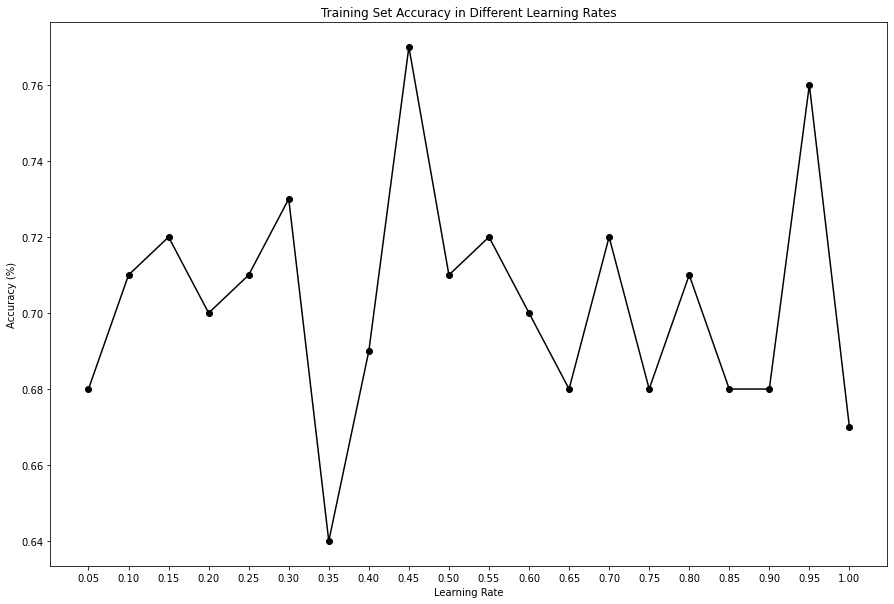

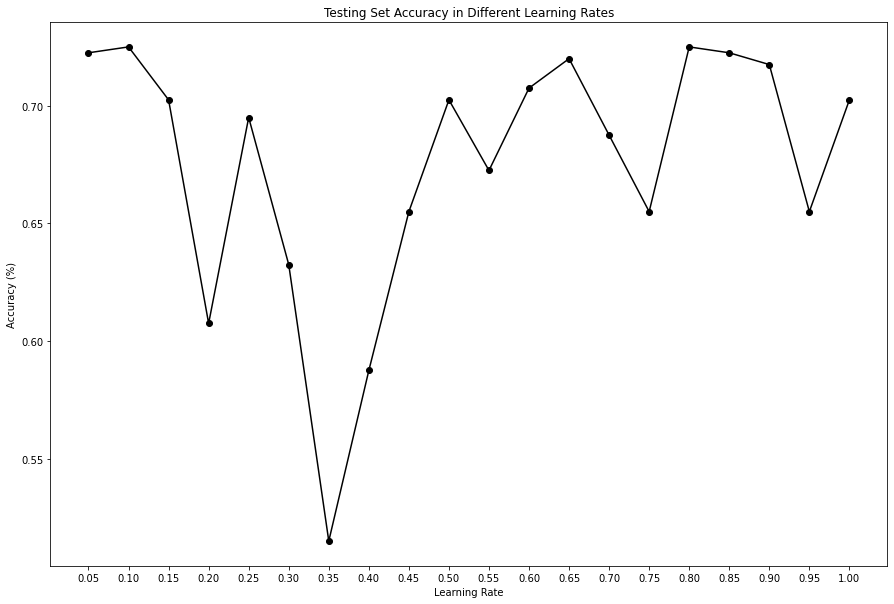

In [ ]:
# Plot the graphs for accuracy results.
f, ax = plt.subplots(figsize = (15,10))
ax.set_title("Training Set Accuracy in Different Learning Rates")
ax.set_xlabel("Learning Rate")
ax.set_ylabel("Accuracy (%)")
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black',)
ax.set_xticks(np.arange(.05,1.05,.05))
plt.plot(learning_rts, train_pts, color='black', marker='o')

f, ax = plt.subplots(figsize = (15,10))
ax.set_title("Testing Set Accuracy in Different Learning Rates")
ax.set_xlabel("Learning Rate")
ax.set_ylabel("Accuracy (%)")
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black',)
ax.set_xticks(np.arange(.05,1.05,.05))
plt.plot(learning_rts,test_pts, color='black', marker='o')

#ID3 Decision Tree

In this section, you will implement the ID3 Decision Tree algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that you are given **all binary-valued attributes** and that there are **no missing values** in the train or test data. 


## Algorithm

(100 points)

Following are the data files that will be provided to you for the ID3 algorithm implementation.

*   Training file - 'id3-train.dat'
*   Testing file - 'id3-test.dat'

*Both these files should be present in the same folder as this code file.* In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

In a decision tree, if you reach a leaf node but still have examples that belong to different classes, then choose the most frequent class (among the instances at the leaf node). If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes, then choose the class that is most frequent in the entire training set. You do not need to implement pruning. Also, don’t forget to use logarithm base 2 when computing entropy and set (0 log 0) to 0.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments. The code should output the following 3 things:

*   Print the Decision Tree created, in the following example format:

    ```
    attr1 = 0 :
        attr2 = 0 :
            attr3 = 0 : 1
            attr3 = 1 : 0
        attr3 = 1 :
            attr4 = 0 : 0
            attr4 = 1 : 1
    attr1 = 1 :
        attr2 = 1 : 1

    ```

*   Accuracy on the Training data = x %
*   Accuracy on the Test data = x %





In [ ]:
# Data file name variables
train_id3=pd.read_csv( basePath + "id3-train.dat", delim_whitespace="/t")
test_id3=pd.read_csv( basePath + "id3-test.dat", delim_whitespace="/t")

In [ ]:
def entropy(probs):
  return sum([-prob*log(prob+.001,2) for prob in probs])

def entropy_list(data):
  counts=Counter(x for x in data)
  num_inst=len(data)
  #print(f'Number of Instances of Current Sub Class is:{num_inst}')
  probs= [x/num_inst for x in counts.values()]
  return entropy(probs)

def information_gained(data,split,target,trace=0):
  split = data.groupby(split)
  nobs = len(data.index)
  agg_ent = split.agg({target:[entropy_list, lambda x: len(x)/nobs]})[target]
  agg_ent.columns = ['Entropy', 'PropObservations']
  new_entropy = sum(agg_ent['Entropy'] * agg_ent['PropObservations'])
  old_entropy = entropy_list(data[target])
  return old_entropy - new_entropy
  
def ID3(data,target,attribute,default_class=None):
   count = data[target]
   class_ratio = count.sum()/len(count)
   if len(count)==1 or class_ratio==1 or class_ratio==0:
    return count.iloc[0]
   elif data.empty or class_ratio==.5:
     return default_class
   elif len(attribute)==0:
     return count.mode().iloc[0]
   else:
     info_gain=[information_gained(data,att,target) for att in attribute]
     index_max=info_gain.index(max(info_gain))
     best_att=attribute[index_max]
     tree ={best_att:{}}
     remaining_attributes=[i for i in attribute if i != best_att]
     for att_val,data_sub in data.groupby(best_att):
       subtree= ID3(data_sub,target,remaining_attributes,default_class)
       tree[best_att][att_val]=subtree
     return tree


In [ ]:
test_attribute_names = list(test_id3.columns)
test_attribute_names.remove('class') 
tree=ID3(train_id3,'class',train_attribute_names,train_id3['class'].mode().iloc[0])
pprint(tree)


{'attr5': {0: {'attr6': {0: {'attr2': {0: {'attr1': {0: {'attr4': {0: {'attr3': {0: 0,
                                                                                 1: 0}},
                                                                   1: {'attr3': {0: 0,
                                                                                 1: 0}}}},
                                                     1: {'attr4': {0: {'attr3': {0: 0,
                                                                                 1: 0}},
                                                                   1: 0}}}},
                                       1: {'attr4': {0: {'attr3': {0: 0,
                                                                   1: {'attr1': {0: 0,
                                                                                 1: 0}}}},
                                                     1: {'attr1': {0: {'attr3': {0: 0,
                                                       

In [ ]:
def classify(instance, tree, default=None):
  attribute=next(iter(tree))
  if instance[attribute] in tree[attribute].keys():
    result=tree[attribute][instance[attribute]]
    if isinstance(result,dict):
      return classify(instance,result)
    else:
      return result
  else:
    return default     

In [ ]:
train_id3['predicted']=train_id3.apply(classify,axis=1,args=(tree,0))
test_id3['predicted'] = test_id3.apply(classify, axis=1, args=(tree,0))
print(f'Accuracy for train data is: ' + str(100*sum(train_id3['class']==train_id3['predicted'])/(len(train_id3.index))))
print(f'Accuracy for test data is is: ' + str(100*sum(test_id3['class']==test_id3['predicted'])/(len(test_id3.index))))

Accuracy for train data is: 89.375
Accuracy for test data is is: 87.19211822660098


##Learning Curve



Instead of taking the entire training data (all 800 instances), I loop through to select 'x' instances in the increments of 40 (i.e. 40, 80, 120, and so on). For each selected number 'x', I randomly pick the example instances from the training data and call the ID3 function to create the decision tree. Calculated the accuracy of the created ID3 tree on the Test data file. I plot the corresponding graph, aka Learning Curve.


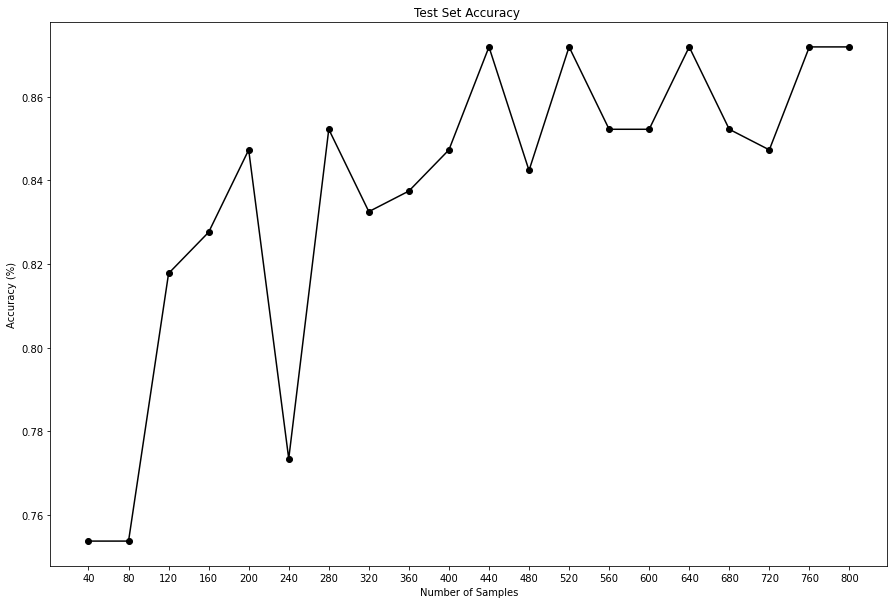

In [ ]:
x=[]
y=[]
for i in range(40,len(train_id3)+1,40):
  sample=train_id3.sample(n=i)
  x.append(i)
  tree=ID3(sample,'class',train_attribute_names,sample['class'].mode().iloc[0])
  test_id3['predicted'] = test_id3.apply(classify, axis=1, args=(tree,0))
  y.append((sum(test_id3['class']==test_id3['predicted'])/(len(test_id3.index))))

f, ax = plt.subplots(figsize = (15,10))
ax.set_title("Test Set Accuracy ")
ax.set_xlabel("Number of Samples")
ax.set_ylabel("Accuracy (%)")
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black',)
ax.set_xticks(np.arange(40,801,40))
plt.plot(x, y, color='black', marker='o')